Import data

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

Load data

In [338]:
df = pd.read_csv("player_injuries.csv")
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [339]:
df = df.sort_values("Player_Age")

Add BMI and age group column to the dataset

In [366]:
def age_group(age):
    if 18 <= age <= 20:
        return 'teenage'
    elif 21 <= age <= 24:
        return 'early_twenties'
    elif 25 <= age <= 29:
        return 'late_twenties'
    elif 30 <= age <= 34:
        return 'early_thirties'
    elif 35 <= age <= 39:
        return 'late_thirties'
    else:
        return 'other'
df['age_group'] = df['Player_Age'].apply(age_group)
df['BMI'] = df.Player_Weight/(df.Player_Height/100)**2
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI,age_group
460,18,79.016255,187.286848,1,0.954566,2,1,22.526923,teenage
278,18,81.947610,161.643424,0,0.044997,3,1,31.363189,teenage
956,18,63.885870,175.271486,0,0.097367,5,1,20.796118,teenage
983,18,64.733593,189.406961,1,0.298066,4,0,18.044209,teenage
914,18,91.309292,176.105985,0,0.000227,2,0,29.441962,teenage


In [368]:
df.shape

(1000, 9)

In [367]:
df.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000,23.351418
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025,4.012540
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000,10.477625
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000,20.593608
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000,23.073222
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000,25.803518
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000,38.854455


In [344]:
df_sort = df[['Player_Age', 'Previous_Injuries', 'Training_Intensity',	'Recovery_Time', 'Likelihood_of_Injury', 'BMI']].groupby(['Player_Age', 'Likelihood_of_Injury', 'Previous_Injuries']).mean().reset_index()
df_sort = pd.melt(df_sort, id_vars=['Player_Age', 'Likelihood_of_Injury', 'Previous_Injuries'], value_vars=['Training_Intensity', 'Recovery_Time', 'BMI'])

Prepairing dataset for graph compairing player's previous injuries and likelihood of getting injured of player training intensity  vs player age 

In [345]:
df_training = df_sort[df_sort.variable == 'Training_Intensity']
df_training

,Player_Age,Likelihood_of_Injury,Previous_Injuries,variable,value
0,18,0,0,Training_Intensity,0.327892
1,18,0,1,Training_Intensity,0.462224
2,18,1,0,Training_Intensity,0.463906
3,18,1,1,Training_Intensity,0.497850
4,19,0,0,Training_Intensity,0.546487
...,...,...,...,...,...
83,38,1,1,Training_Intensity,0.503647
84,39,0,0,Training_Intensity,0.333403
85,39,0,1,Training_Intensity,0.441888
86,39,1,0,Training_Intensity,0.560447


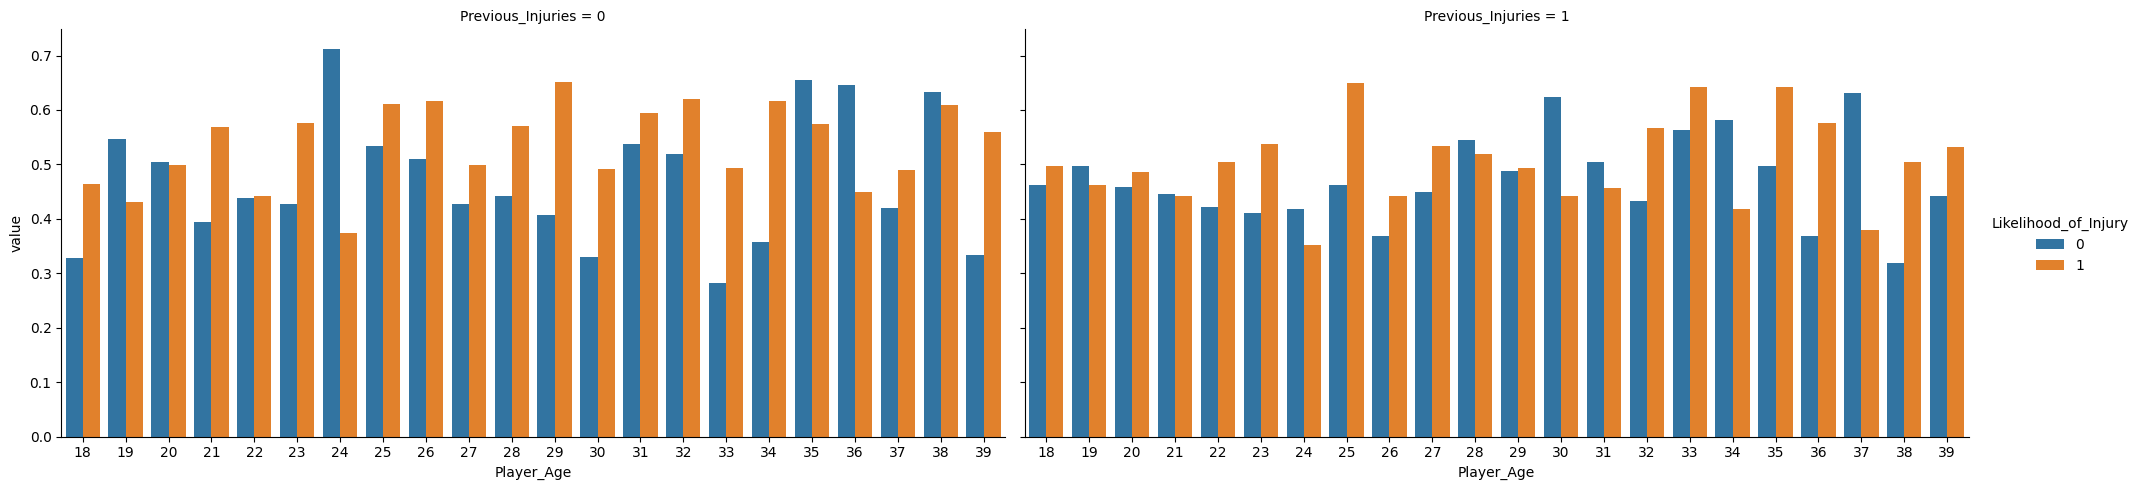

In [346]:

sns.catplot(data=df_training, x='Player_Age', y='value', hue='Likelihood_of_Injury', col='Previous_Injuries', kind='bar', aspect=2, height=5)
plt.show()

prepairing dataset for sankey diagram

In [347]:
df_sankey1 = df.groupby(['age_group', 'Previous_Injuries'])['Likelihood_of_Injury'].count().reset_index()
df_sankey1.columns = ['source', 'target', 'value']

In [348]:
df_sankey1['target'] = df_sankey1.target.map({0:'not injured', 1: 'was injured'})

In [349]:
df_sankey2 = df.groupby(['Previous_Injuries', 'Likelihood_of_Injury'])['age_group'].count().reset_index()
df_sankey2.columns = ['source', 'target', 'value']

In [350]:
df_sankey2['source'] = df_sankey2.source.map({0:'not injured', 1: 'was injured'})
df_sankey2['target'] = df_sankey2.target.map({0:'will not injure', 1: 'will injure'})
df_sankey2

,source,target,value
0,not injured,will not injure,252
1,not injured,will injure,233
2,was injured,will not injure,248
3,was injured,will injure,267


In [351]:
links = pd.concat([df_sankey1, df_sankey2], axis=0)

In [352]:
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))

In [353]:
mapping_dict = {k:v for v, k in enumerate(unique_source_target)}

In [354]:
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

In [356]:
links_dict = links.to_dict(orient='list')

Creating the sankey diagram

In [365]:
fig = go.Figure(data=[go.Sankey(

    node=dict(
      pad=40,
      thickness=25,
      line=dict(color='black', width=0.5),
      label=unique_source_target
    ),
    link=dict(
      source=links['source'],
      target=links['target'],
      value=links['value'],
    ))])

# Render the diagram
fig.update_layout(title_text= "Player's injuries alluvial diagram", font_size= 15, width=1200, height=600)
fig.show()